In [1]:
import numpy as np
import pandas as pd
from math import *
import numpy.linalg as LA
import matplotlib.pyplot as plt
from sympy import *
import dataframe_image as dfi

# ZAD 1

In [2]:
X0=np.array([[1000], [2000], [1500], [500]])
L=np.array([[0,3,3,3], [0.2,0,0,0], [0,0.29,0,0], [0,0,0.1,0]])
L10=LA.matrix_power(L, 10)
X10=np.dot(L10, X0)
print(X10)

dL, VL = LA.eig(L)
#print(max(dL))
#print(dL)
#print(VL[0])

[[2637.0969444 ]
 [ 615.2185872 ]
 [ 182.8332144 ]
 [  22.75216344]]


# ZAD 3

In [3]:
def G(x,beta):
    return e**(-5*x**2)+beta

In [4]:
x0=0.1
beta1=-0.5
x_orbit=[]
for i in range(1000):
    xn=G(x0,beta1)
    x0=xn
    if i>199 and i<221:
        x_orbit.append(xn)
df = pd.DataFrame({'Gn': x_orbit},index=[n for n in range (200,221)]).rename_axis('n', axis=1)
print(df)
#dfi.export(df,"orbita.png")

n          Gn
200  0.405591
201 -0.060677
202  0.481760
203 -0.186659
204  0.340122
205  0.060786
206  0.481695
207 -0.186561
208  0.340277
209  0.060492
210  0.481870
211 -0.186825
212  0.339861
213  0.061283
214  0.481397
215 -0.186111
216  0.340981
217  0.059148
218  0.482660
219 -0.188016
220  0.337990


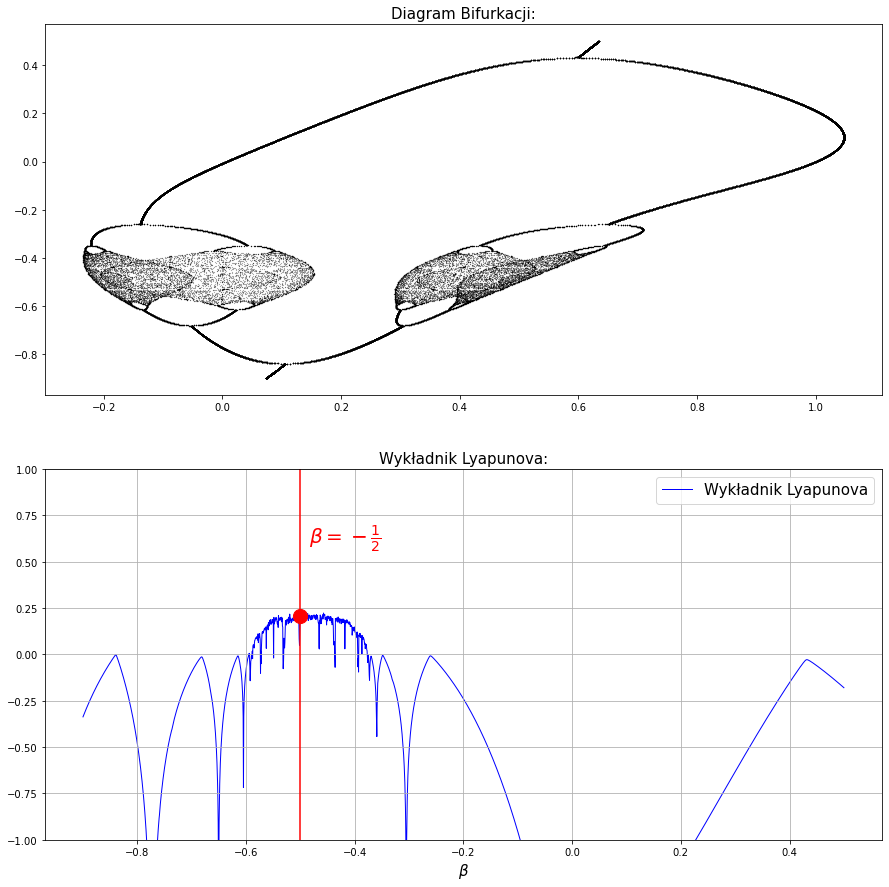

In [11]:
lyapunov = []
y1 = []
y2 = []
beta_values=np.linspace(-0.9,0.5, 2500)
for beta in beta_values:
    x = 0.1
    log = []
    for i in range(500):
        x = G(x, beta)
        log.append(np.log(abs(-10*x*e**(-5*x**2))))
    lyapunov.append(np.mean(log))
    for t in range(50):
        x = G(x, beta)
        y1.append([x, beta])
        y2.append(x)
    if beta==-0.5:
        betachaos=lyapunov[-1]
    

    
fig, (ax2,ax1)  = plt.subplots(2,1, figsize=(15,15))
ax1.plot(beta_values, lyapunov, 'b-', lw=1, label='Wykładnik Lyapunova', zorder=1)
ax1.scatter(-1/2, betachaos, color="red", s=200, zorder=2)
plt.axvline(x = -1/2, color = 'red')
ax1.annotate(r'$\beta = -\frac{1}{2}$', [-1/2+1/60, 0.6], size=20, color="red")
ax1.grid('on')
ax1.set_ylim(-1, 1)
ax1.set_xlabel(r'$\beta$', fontsize=15)
ax1.legend(loc='best', fontsize=15)
ax1.set_title('Wykładnik Lyapunova:', fontsize=15)

y1 = np.array(y1)
ax2.plot(y1[:, 0], y1[:, 1], 'k.', markersize=0.25)
ax2.set_title('Diagram Bifurkacji:', fontsize=15)
plt.savefig("Lapunov")